Nur Halisah Fasya
20090148

**Mall Customers Clustering Analysis**

<img src="https://images.unsplash.com/photo-1519567241046-7f570eee3ce6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80" width="1000px">

**Installing the Libraries**

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
# Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('/content/gdrive/MyDrive/SEMESTER 4/Data Mining/LabSession3/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# checking if there is any NULL data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

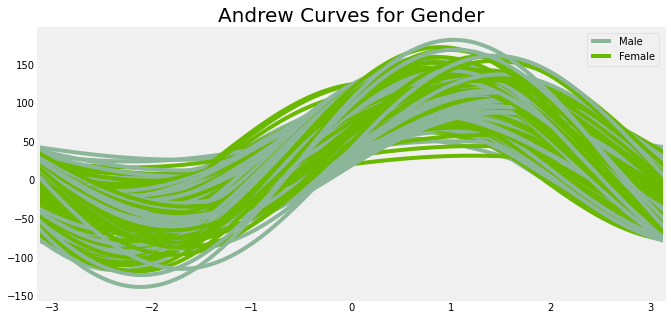

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)


plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

* Kurva Andrews di atas mampu merepresentasikan rata-rata, jarak (hingga konstanta), dan varians. Artinya, kurva Andrews menunjukkan fungsi yang berdekatan maka titik data yang sesuai juga akan berdekatan

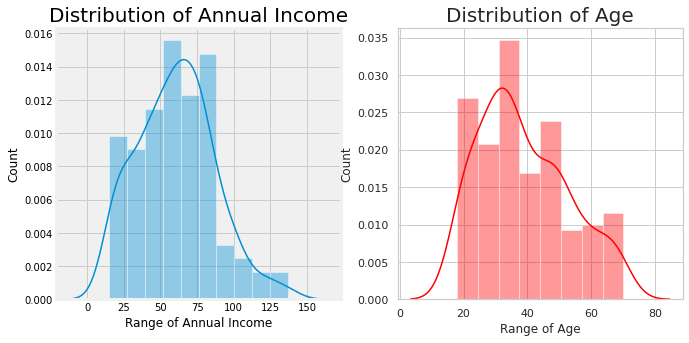

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Berikut penjelasan singkat tentang sebaran distribusi Annual Income and Age, berdasarkan plot data yang telah dilakukan

>> sedikit orang yang memiliki penghasilan lebih dari 100 US Dollars.
>> kebanyakan orang memiliki penghasilan di kisaran 50-75 US Dollars.
>> penghasilan terrendah di kisaran 20 US Dollars.

> Dari data tersebut juga dapat disimpulkan
>> kebanyakan pengunjung Mall adalah di kisaran umur 30-35.
>> kelompok kawula muda lebih sedikit dibandingkan mereka yang berada di Middle aged people.


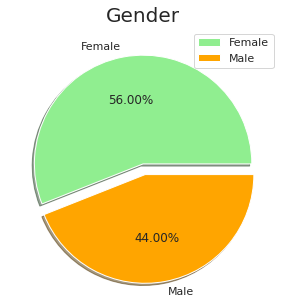

In [ ]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> dari diagram pie tersebut terlihat distribusi daei Gender yang mengunjungi mall
>> yang menarik adalah perempuan menguasai perolehan porsi 56% sebagai pengunjung mall dimana laki-laki hanya 44%.

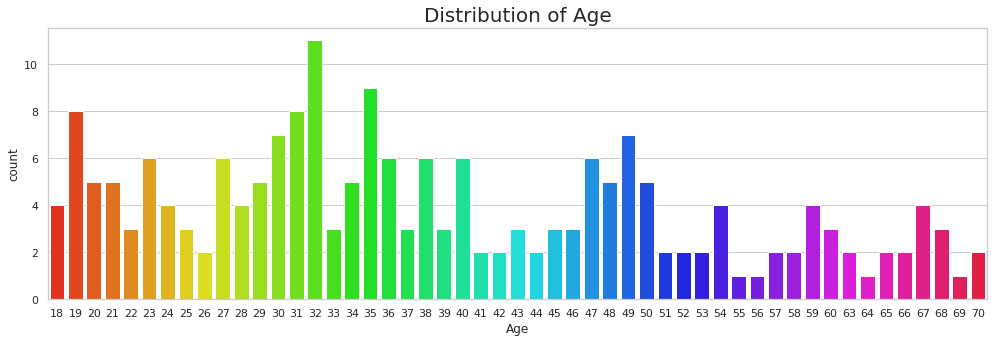

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> Kesimpulan distribusi sebaran Kelompok Age yang mengunjungi Mall.
>> dari grafik pengunjung dengan range umur 27 sampai 39 mendominasi akan tetapi secara pola tidak dapat terlihat dengan jelas.
>> tidak ada jumlah pengunjung yang sama dari umur 18 sampai 67.
>> pengunjung dengan umur 55, 56, 69, 64 paling sedikit
>> pengunjung dengan umur 32 yang sering mengunjungi Mall.

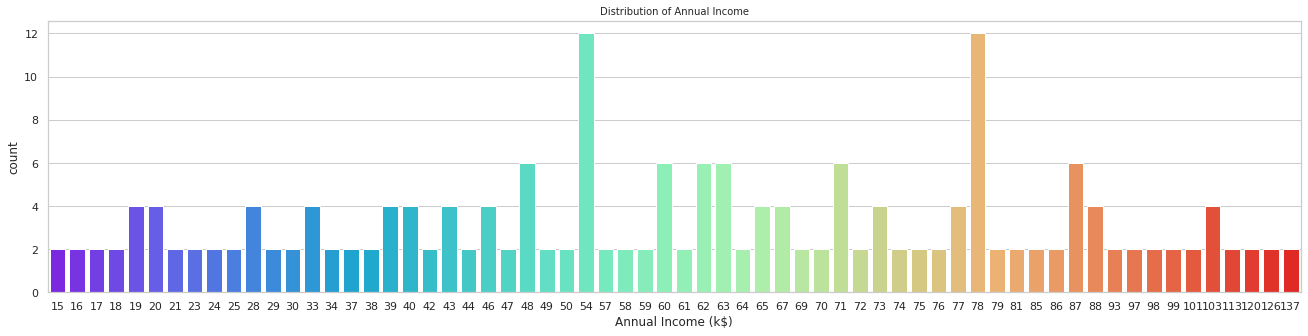

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 10)
plt.show()

> Pengunjung Mall terbanyak adalah yang memiliki penghasilan 54k US Dollars atau 78 US Dollars.

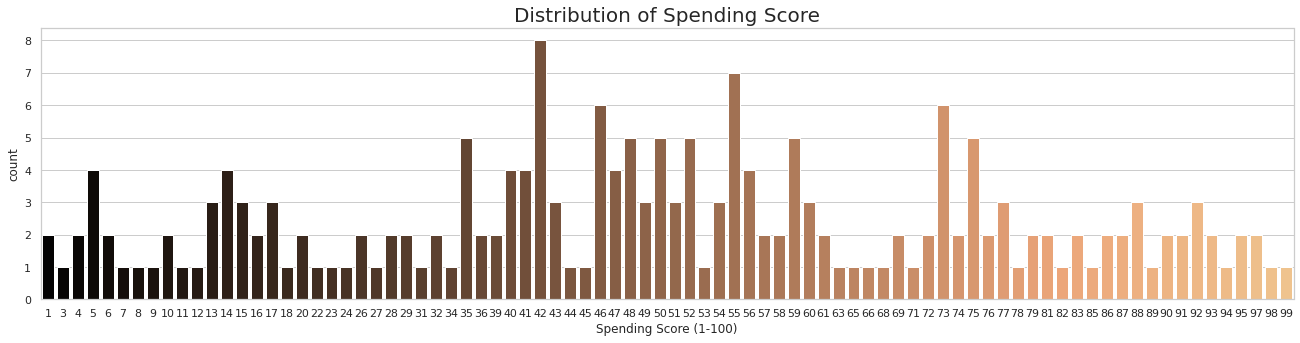

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> secara umum skor pembelanjaan barang mereka berkisar antara 35-60.

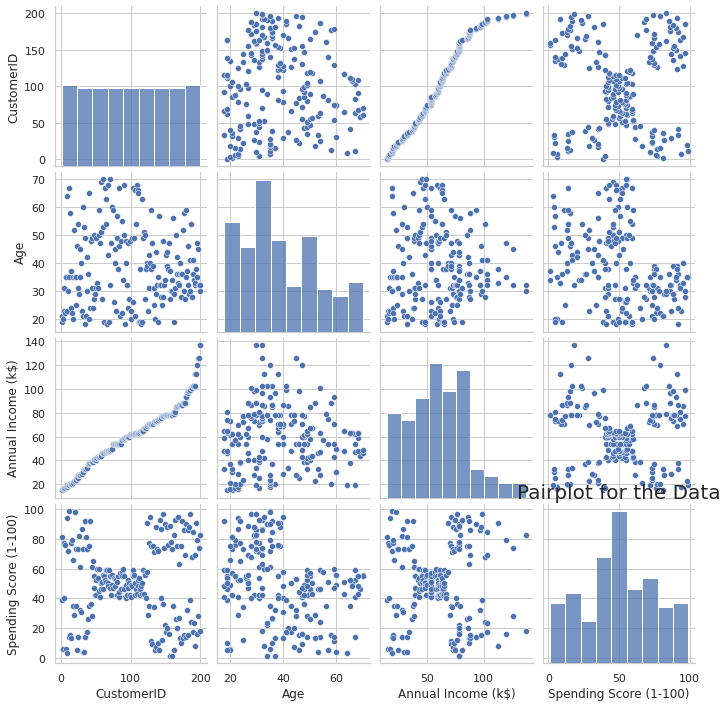

In [ ]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

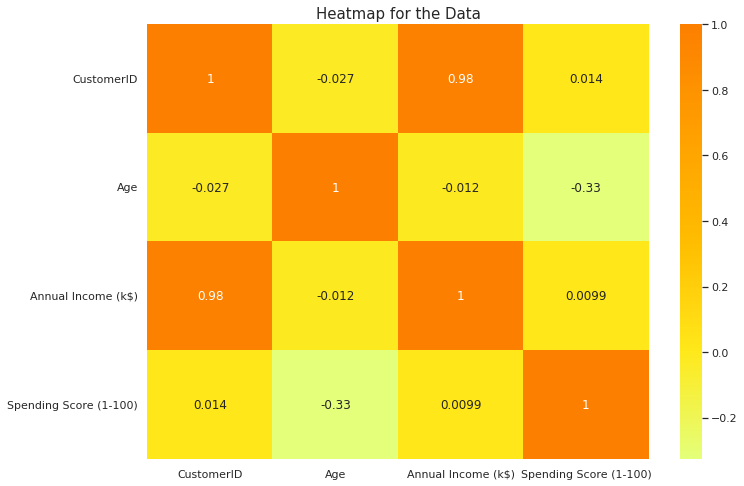

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

> Grafik di atas menunjukkan hubungan, yang erat hubungannya berwarna semakin orange, sedangkan yang semakin jauh berwarna kuning.

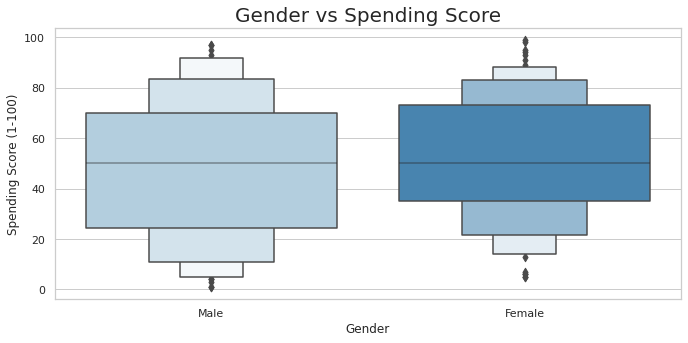

In [ ]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> Grafik menunjukkan banyaknya pengeluaran yang dihabiskan oleh perempuan maupun laki-laki. jika dilihat laki-laki ada di kisaran 25-70k USD sedangkan perempuan di kisaran 38-75k USD.

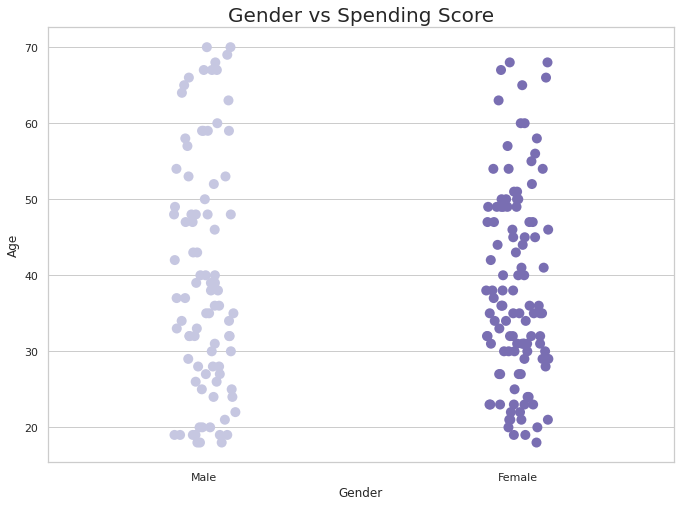

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

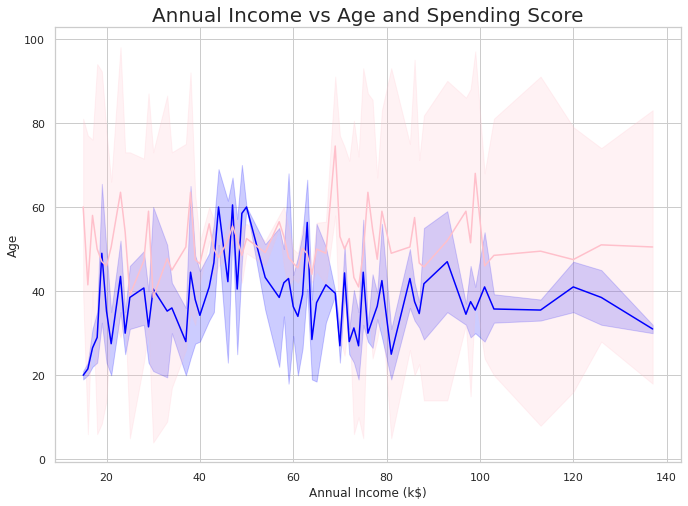

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> plot di atas adalah peghasilan dengan umur direpresentasikan dengan garis biru, sedangkan hubungan penghasilan dengan uang yang dibelanjakan ditunjukkan dengan warna pink

## Clustering Analysis

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = data.iloc[:, [3, 4]].values
#: = seluruh data
#3, 4 = atribut 3 dan 4

# let's check the shape of x
print(x.shape)

(200, 2)


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

Elbow digunakan untuk menentukan jumlah cluster terbaik, tanpa melakukan brute force

> Ada beberapa parameter yang digunakan :
>> **init** merupakan teknik permulaan. Versi standar untuk menerapkan algoritma k-means dengan setting init "random".

>> **n_clusters** adalah jumlah cluster yang akan digunakan.

>> **n_init** adalah jumlah inisiasi yang akan diterapkan.

>> **max_iter** adalah jumlah maksimal iterasi pada algoritma k-means.

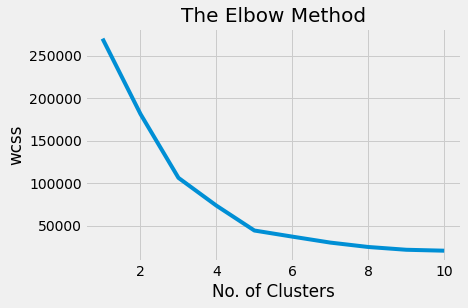

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

> Dari grafik tersebut terlihat bahwa paling maksimal pada jumlah cluster 5

**Visualizaing the Clusters**

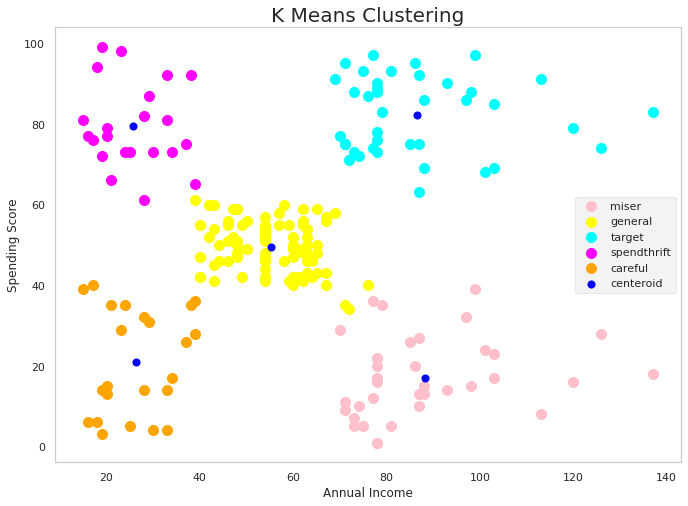

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> Cluster tersebut memberikan pengetahuan bahwa pengunjung Mall terdiri dari banyak tingkatan berbeda. Ada 5 segmen pengunjung Mall yaitu Miser, General, Target, Spendthrift,  Careful berdasarkan Annual Income dan nilai Spending Score.

In [ ]:
data1 = data.iloc[:, [2, 4]].values
#: = seluruh data
#2, 4 = atribut 2 dan 4

# let's check the shape of x
print(data1.shape)

(200, 2)


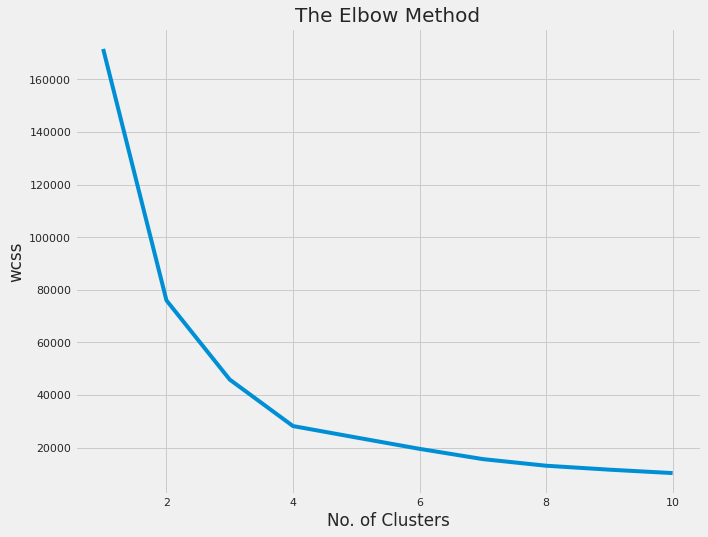

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data1)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

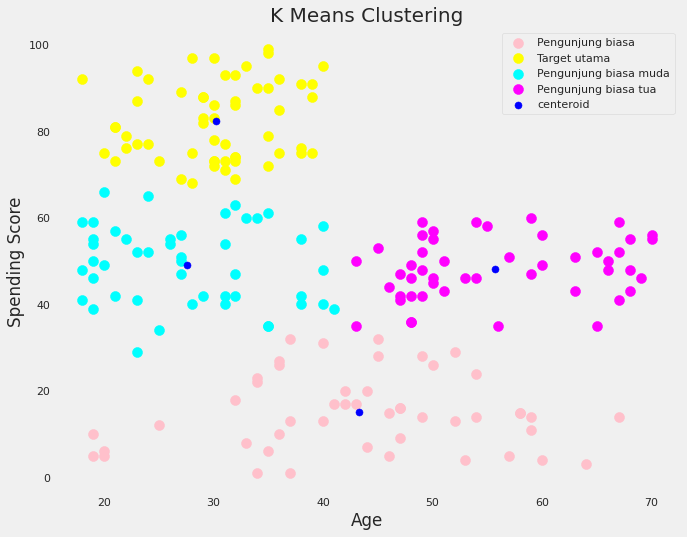

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data1)

plt.scatter(data1[y_means == 0, 0], data1[y_means == 0, 1], s = 100, c = 'pink', label = 'Pengunjung biasa')
plt.scatter(data1[y_means == 1, 0], data1[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target utama')
plt.scatter(data1[y_means == 2, 0], data1[y_means == 2, 1], s = 100, c = 'cyan', label = 'Pengunjung biasa muda')
plt.scatter(data1[y_means == 3, 0], data1[y_means == 3, 1], s = 100, c = 'magenta', label = 'Pengunjung biasa tua')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data2 = data.iloc[:, [2, 3, 4]].values

print(data2.shape)

(200, 3)


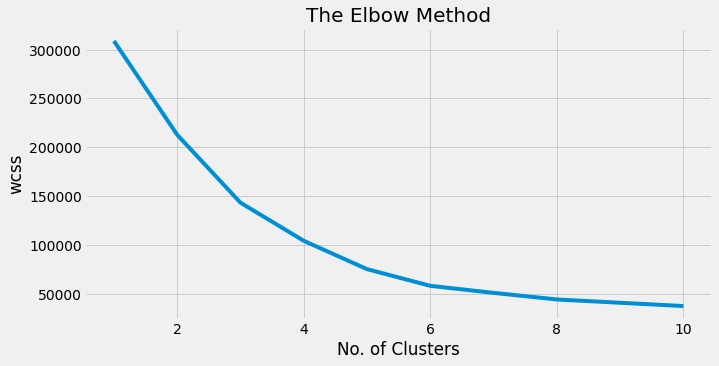

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data2)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

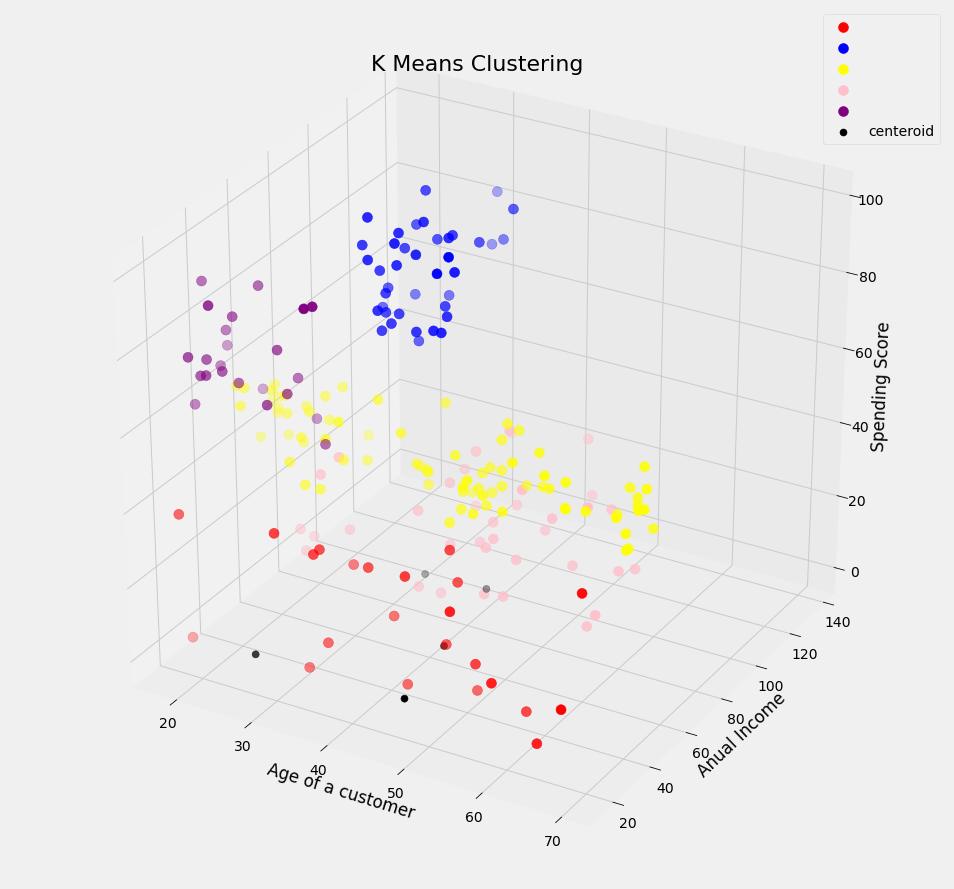

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data2)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[y_means == 0, 0], data2[y_means == 0, 1], data2[y_means == 0, 2], s=100, c = 'red', label = ' ')
ax.scatter(data2[y_means == 1, 0], data2[y_means == 1, 1], data2[y_means == 1, 2], s=100, c = 'blue', label = ' ')
ax.scatter(data2[y_means == 2, 0], data2[y_means == 2, 1], data2[y_means == 2, 2], s=100, c = 'yellow', label = ' ')
ax.scatter(data2[y_means == 3, 0], data2[y_means == 3, 1], data2[y_means == 3, 2], s=100, c = 'pink', label = ' ')
ax.scatter(data2[y_means == 4, 0], data2[y_means == 4, 1], data2[y_means == 4, 2], s=100, c = 'purple', label = ' ')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 22)
ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score ')
ax.legend()
plt.show()